In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [57]:
im = cv2.imread('Sunflower.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (int(im.shape[1]/5), int(im.shape[0]/5)))

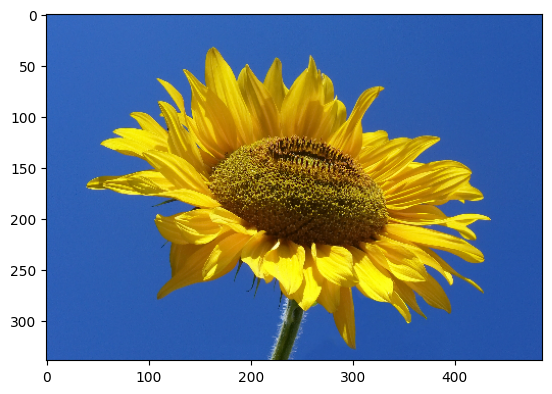

In [58]:
plt.imshow(im)

In [59]:
def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

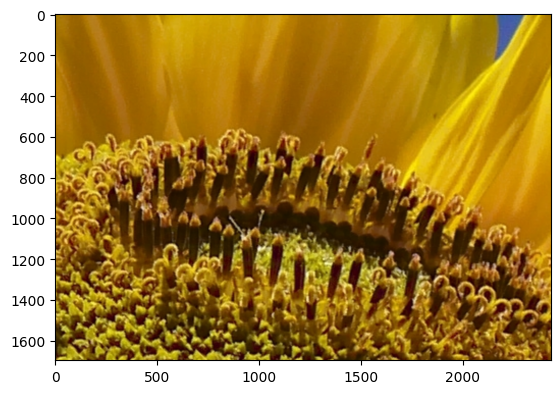

In [61]:
zoom_X5_im = zoom_at(im, zoom=5, coord = (150, 250))
plt.imshow(zoom_im)

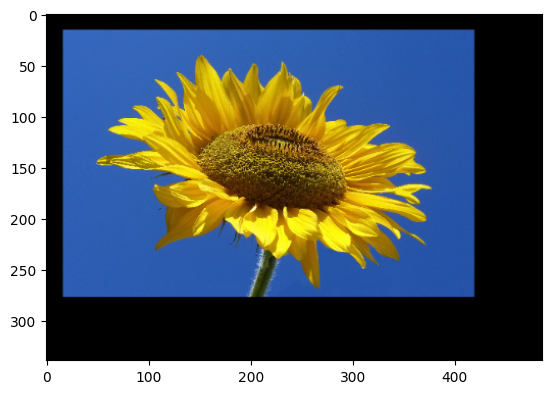

In [64]:
borderoutput = cv2.copyMakeBorder( 
    im, 20, 80, 20, 80, cv2.BORDER_CONSTANT, value=[0, 0, 0])
borderoutput = cv2.resize(borderoutput, im.shape[:2][::-1])
plt.imshow(borderoutput)

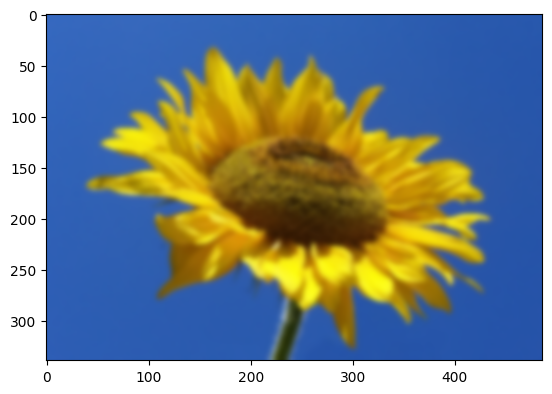

In [130]:
blured = cv2.GaussianBlur(im,(15,15),0)
plt.imshow(blured)

C:\Users\Егор\AppData\Local\Temp\ipykernel_18572\1019876148.py:9: RuntimeWarning: overflow encountered in exp
  hapka[i][j] = im[i][j] - napas[i][j] *(1/(1 + np.exp(a *(n - np.sqrt((i - center[1])**2 + (j - center[0])**2)))))


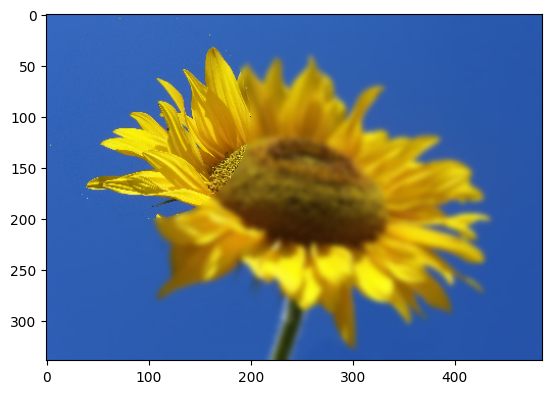

In [189]:
napas = (im - blured)
hapka = np.zeros_like(im)
center = (100, 100)
n = 100
a = 255
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        #hapka[i][j] = im[i][j] - blured[i][j] * (1/(1 + np.exp(n - np.sqrt((center[0] - i)**2+(center[1])**2-j))))
        hapka[i][j] = im[i][j] - napas[i][j] *(1/(1 + np.exp(a *(n - np.sqrt((i - center[1])**2 + (j - center[0])**2)))))
plt.imshow(hapka)

In [184]:
def accent(im, lower,upper):
    hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV) 
    mask = cv2.inRange(hsv, tuple(lower), tuple(upper)) 
    result = cv2.bitwise_and(im, im, mask = mask)
    return result

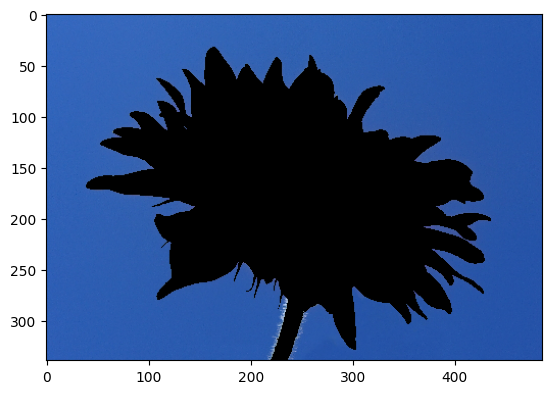

In [185]:
im_accented = accent(im,[60, 35, 140], [180, 255, 255])
plt.imshow(im_accented)

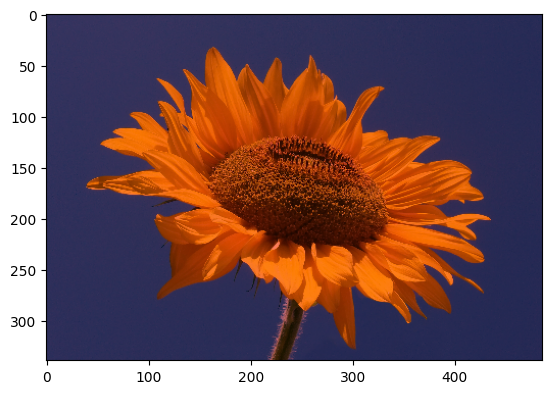

In [188]:
more_red = np.zeros_like(im)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        more_red[i][j][0] = im[i][j][0] 
        more_red[i][j][1] = im[i][j][1] * 0.5
        more_red[i][j][2] = im[i][j][2] * 0.5
plt.imshow(more_red)